In [603]:
import pandas as pd
import numpy as np
import seaborn as sns

In [604]:
from sklearn import preprocessing

In [605]:
df = pd.read_csv('ECommerceCustomerDataSet.csv',sep=';',decimal=',')

In [606]:
df.head()

,Month_of_Year,ISO_Week_of_ISO_Year,CV_UserID,Sessions,Quantity_Added_To_Cart,Bounce_Rate,Pageviews,Exits,Unique_Pageviews,Avg__Session_Duration,Transactions
0,200105,200119,4231,62,0,0.451613,261,62,183,101.322581,0
1,200105,200121,4274,57,39,0.175439,720,57,447,707.754386,2
2,200105,200118,4231,38,6,0.421053,252,38,158,242.815789,0
3,200105,200120,800,33,5,0.484848,296,33,178,332.939394,1
4,200105,200119,6806,30,25,0.100000,724,30,327,662.900000,3


In [607]:
# Kolon isimlerini değiştiriyorum
to_rename = [column for column in df.columns]
acronyms = ['Yil_Ay', 'Yil_Hafta', 'Kullanici_ID', 'Oturumlar', 'SepetUrunSayisi', 'Bounce_Rate' , 'Sayfa_Goruntuleme', 'Cikislar', 'Tekil_Sayfa_Goruntuleme', 'Ort_Oturum_Suresi', 'Islem_Sayisi'] 
mapping = {key: value for key, value in zip(to_rename,acronyms)}
df = df.rename(columns = mapping)
df.columns

Index(['Yil_Ay', 'Yil_Hafta', 'Kullanici_ID', 'Oturumlar', 'SepetUrunSayisi',
       'Bounce_Rate', 'Sayfa_Goruntuleme', 'Cikislar',
       'Tekil_Sayfa_Goruntuleme', 'Ort_Oturum_Suresi', 'Islem_Sayisi'],
      dtype='object')

In [608]:
df.head()

,Yil_Ay,Yil_Hafta,Kullanici_ID,Oturumlar,SepetUrunSayisi,Bounce_Rate,Sayfa_Goruntuleme,Cikislar,Tekil_Sayfa_Goruntuleme,Ort_Oturum_Suresi,Islem_Sayisi
0,200105,200119,4231,62,0,0.451613,261,62,183,101.322581,0
1,200105,200121,4274,57,39,0.175439,720,57,447,707.754386,2
2,200105,200118,4231,38,6,0.421053,252,38,158,242.815789,0
3,200105,200120,800,33,5,0.484848,296,33,178,332.939394,1
4,200105,200119,6806,30,25,0.100000,724,30,327,662.900000,3


In [609]:
## Null değerim var mı ?
df.isnull().values.any()

False

In [610]:
df.dtypes

Yil_Ay                       int64
Yil_Hafta                    int64
Kullanici_ID                 int64
Oturumlar                    int64
SepetUrunSayisi              int64
Bounce_Rate                float64
Sayfa_Goruntuleme            int64
Cikislar                     int64
Tekil_Sayfa_Goruntuleme      int64
Ort_Oturum_Suresi          float64
Islem_Sayisi                 int64
dtype: object

In [611]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
variables

,Variable,Number of unique values,Values
0,Yil_Ay,5,"[200105, 200107, 200106, 200103, 200104]"
1,Yil_Hafta,23,"[200119, 200121, 200118, 200120, 200122, 20013..."
2,Kullanici_ID,11593,"[4231, 4274, 800, 6806, 6690, 6217, 6538, 1310..."
3,Oturumlar,196,"[62, 57, 38, 33, 30, 26, 23, 21, 16, 20, 24, 2..."
4,SepetUrunSayisi,139,"[0, 39, 6, 5, 25, 2, 3, 19, 14, 9, 21, 1, 20, ..."
5,Bounce_Rate,717,"[0.451612903, 0.175438596, 0.421052632, 0.4848..."
6,Sayfa_Goruntuleme,1121,"[261, 720, 252, 296, 724, 124, 233, 117, 181, ..."
7,Cikislar,198,"[62, 57, 38, 33, 30, 26, 23, 21, 16, 20, 24, 2..."
8,Tekil_Sayfa_Goruntuleme,881,"[183, 447, 158, 178, 327, 56, 209, 83, 123, 25..."
9,Ort_Oturum_Suresi,28865,"[101.3225806, 707.754386, 242.8157895, 332.939..."


In [686]:
##Oturumlar ve Cikislar eşit olmayan veri var mı ? Eşit ise Cikislar bizim için anlamlı bir veri olmayacak

In [613]:
df[df['Oturumlar']!=df['Cikislar']]

,Yil_Ay,Yil_Hafta,Kullanici_ID,Oturumlar,SepetUrunSayisi,Bounce_Rate,Sayfa_Goruntuleme,Cikislar,Tekil_Sayfa_Goruntuleme,Ort_Oturum_Suresi,Islem_Sayisi
88,200105,200121,15678,14,4,0.428571,258,13,151,701.500000,1
150,200105,200121,7030,11,16,0.090909,144,10,119,1002.090909,2
384,200105,200120,11400,9,8,0.222222,120,8,100,893.666667,3
458,200107,200127,13101,4,4,0.250000,3,2,3,626.500000,0
815,200107,200131,2991,1,3,0.000000,0,0,0,1372.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
104888,200106,200123,12105,6,1,0.166667,26,5,13,600.833333,0
105077,200106,200125,3023,5,7,0.200000,71,4,47,601.400000,0
106613,200106,200122,14103,9,9,0.666667,83,8,73,250.222222,0
107409,200106,200122,69,3,1,0.333333,6,2,6,122.666667,0


In [614]:
len(df[df['Oturumlar']!=df['Cikislar']])

168

In [615]:
len(df)

107804

In [616]:
## Oturumlar ve Cikislar farklı olan veri sayısı[168] toplam veri sayısına[107804] kıyasla az olduğu için Cikislar kolonunu çıkartabilirim

In [617]:
df = df.drop(['Cikislar'],axis=1)

## Bounce_Rate kolonu incelemesi

In [618]:
df[df['Bounce_Rate']==1]

,Yil_Ay,Yil_Hafta,Kullanici_ID,Oturumlar,SepetUrunSayisi,Bounce_Rate,Sayfa_Goruntuleme,Tekil_Sayfa_Goruntuleme,Ort_Oturum_Suresi,Islem_Sayisi
288,200107,200130,2798,1,0,1.0,1,1,0.0,0
294,200105,200120,5590,7,0,1.0,7,7,0.0,0
594,200107,200130,1687,1,0,1.0,1,1,1.0,0
626,200107,200130,8227,1,0,1.0,1,1,1.0,0
655,200107,200131,13578,1,0,1.0,1,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...
107749,200104,200117,11052,1,0,1.0,1,1,0.0,0
107750,200104,200117,3774,1,0,1.0,1,1,0.0,0
107774,200104,200115,8388,1,0,1.0,1,1,0.0,0
107778,200104,200115,13033,1,0,1.0,1,1,0.0,0


In [619]:
## Kullanici ID'ye göre grupladığımızda bir kullanıcının kaç haftalık kaydı var ortaya çıkar
df.groupby(['Kullanici_ID']).Yil_Hafta.size()

Kullanici_ID
3         1
4        12
6        21
7         2
8        12
         ..
15995     2
15996     1
15997     7
15998     4
15999     4
Name: Yil_Hafta, Length: 11593, dtype: int64

In [620]:
grouper = df.groupby('Kullanici_ID')
res = grouper.count()

## Bounce_Rate değerinin toplamı hafta sayısına eşit olan kullanıcılar bütün girişlerinde ilk 30 sn'de çıkmış demektir.
res['Bounce_Rate'] = grouper.Bounce_Rate.sum()
hareketsiz_kullanici = res[res['Bounce_Rate']==res['Yil_Hafta']]


In [621]:
hareketsiz_kullanici.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1722 to 15908
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Yil_Ay                   55 non-null     int64  
 1   Yil_Hafta                55 non-null     int64  
 2   Oturumlar                55 non-null     int64  
 3   SepetUrunSayisi          55 non-null     int64  
 4   Bounce_Rate              55 non-null     float64
 5   Sayfa_Goruntuleme        55 non-null     int64  
 6   Tekil_Sayfa_Goruntuleme  55 non-null     int64  
 7   Ort_Oturum_Suresi        55 non-null     int64  
 8   Islem_Sayisi             55 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 4.3 KB


In [635]:
hareketsiz_kullanici.reset_index(inplace=True)

In [637]:
## bu kullanıcılar bizim için sağlıklı veri değildir
df = df[~df.Kullanici_ID.isin(hareketsiz_kullanici.Kullanici_ID)]

In [640]:
df.Bounce_Rate.describe()

count    107729.000000
mean          0.179579
std           0.275228
min           0.000000
25%           0.000000
50%           0.000000
75%           0.285714
max           1.000000
Name: Bounce_Rate, dtype: float64

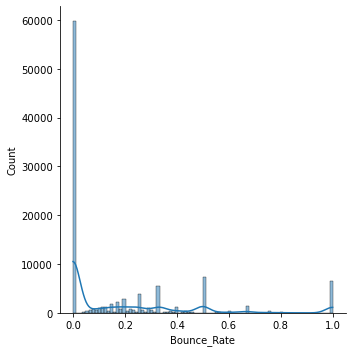

In [642]:
sns.displot(df.Bounce_Rate, kde = True);

In [641]:
df[df.Bounce_Rate > 0].Bounce_Rate.describe()

count    47914.000000
mean         0.403762
std          0.282487
min          0.016667
25%          0.200000
50%          0.333333
75%          0.500000
max          1.000000
Name: Bounce_Rate, dtype: float64

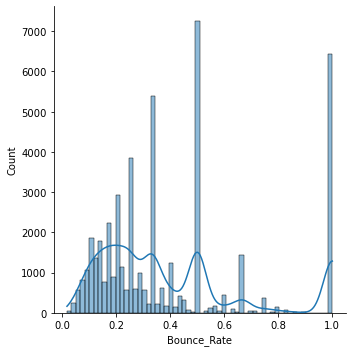

In [643]:
sns.displot(df[df.Bounce_Rate > 0].Bounce_Rate, kde = True);

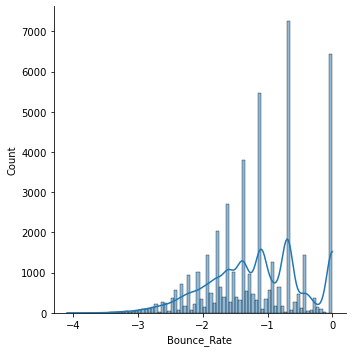

In [644]:
sns.displot(np.log(df[df.Bounce_Rate > 0].Bounce_Rate), kde = True);

<AxesSubplot:>

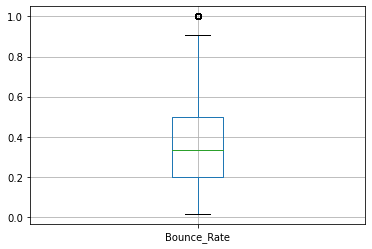

In [645]:
dft1 = df[df.Bounce_Rate > 0]
dft1.boxplot("Bounce_Rate")

In [ ]:
## Islem Sayısı inceleme

In [654]:
maketotal=df.pivot_table(values="Islem_Sayisi",index=["Yil_Hafta"],aggfunc="sum")
maketotal

,Islem_Sayisi
Yil_Hafta,
200109,443
200110,900
200111,933
200112,1024
200113,1127
200114,1011
200115,1008
200116,1010
200117,1053


<AxesSubplot:xlabel='Yil_Hafta'>

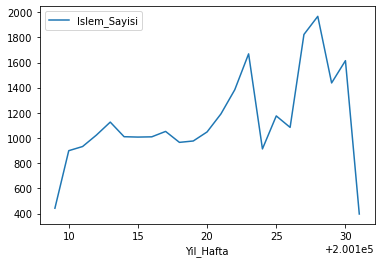

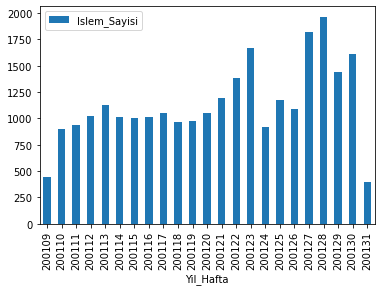

In [655]:
maketotal.plot()
maketotal.plot.bar()

In [664]:
## yukarıdaki grafiklerden de görüldüğü gibi baştaki 9.hafta ile sondaki 31.haftada eksik günler yer alıyor. 
## Bu haftaları çıkartabiliriz.
df = df[(df.Yil_Hafta != 200109) & (df.Yil_Hafta != 200131)]

In [665]:
aylik_toplam=df.pivot_table(values="Islem_Sayisi",index=["Yil_Ay"],aggfunc="sum")
aylik_toplam

,Islem_Sayisi
Yil_Ay,
200103,3875
200104,4334
200105,4861
200106,5299
200107,6952


<AxesSubplot:xlabel='Yil_Ay'>

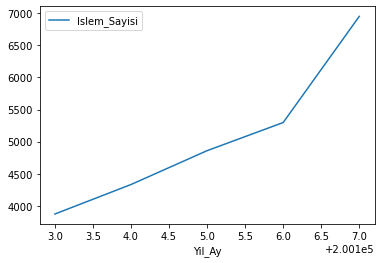

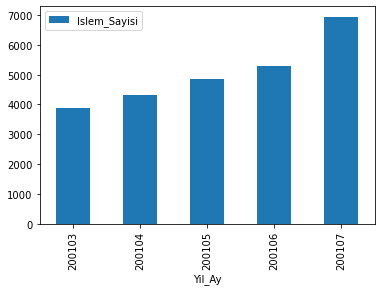

In [666]:
aylik_toplam.plot()
aylik_toplam.plot.bar()

In [669]:
df['Islem_Sayisi'].describe()

count    101377.000000
mean          0.249771
std           0.721240
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          51.000000
Name: Islem_Sayisi, dtype: float64

In [670]:
df.groupby('Islem_Sayisi').size()

Islem_Sayisi
0     80251
1     18534
2      2056
3       338
4        92
5        33
6        10
7        11
8         9
9         7
10        5
12        1
14        1
15        1
16        2
17        4
18        1
20        3
21        2
22        1
23        2
27        2
28        1
29        1
31        1
34        1
39        1
40        1
41        1
42        1
44        2
51        1
dtype: int64

In [385]:
df[df['Islem_Sayisi']>10].groupby('Kullanici_ID').count()

,Yil_Ay,Yil_Hafta,Oturumlar,SepetUrunSayisi,Bounce_Rate,Sayfa_Goruntuleme,Tekil_Sayfa_Goruntuleme,Ort_Oturum_Suresi,Islem_Sayisi
Kullanici_ID,,,,,,,,,
3534,25,25,25,25,25,25,25,25,25
4443,6,6,6,6,6,6,6,6,6


<AxesSubplot:xlabel='Yil_Hafta'>

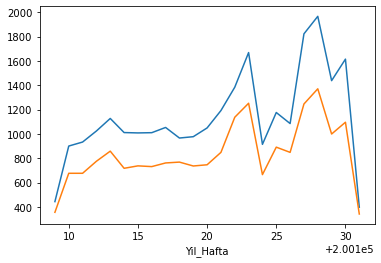

In [660]:
mf = df[df.Islem_Sayisi==1]
haftalik_toplam_islem.plot()
mf.groupby('Yil_Hafta').Islem_Sayisi.sum().plot()

In [671]:
##Bizim için işlem sayısı değil işlem yapılıp yapılmadığı önemli, buna göre etiketliyoruz.
df.reset_index()
df['Islem_Varmi'] = np.where(df['Islem_Sayisi'] > 0, 1, 0)

<ipython-input-671-4887888c9f01>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Islem_Varmi'] = np.where(df['Islem_Sayisi'] > 0, 1, 0)


In [672]:
df['Sepette_Urun_Varmi'] = np.where(df['SepetUrunSayisi'] > 0,1,0)

<ipython-input-672-a27b6d69a7f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sepette_Urun_Varmi'] = np.where(df['SepetUrunSayisi'] > 0,1,0)


## Oturumlar kolonunu inceliyoruz

In [389]:
df.Oturumlar.describe()

count    107729.000000
mean          6.108587
std          13.246259
min           0.000000
25%           1.000000
50%           3.000000
75%           6.000000
max         698.000000
Name: Oturumlar, dtype: float64

<AxesSubplot:>

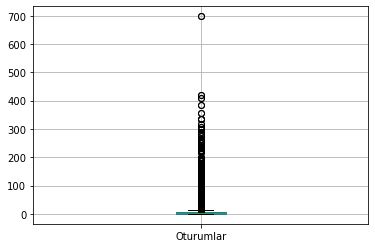

In [390]:
##Oturumları ölçeklendirmeden önce aykırı değer var mı bakalım
df.boxplot("Oturumlar")

In [391]:
#Oturumlar kolonunun %75lik değeri 6'dan büyük olanlara bakalım

In [263]:
df[df['Oturumlar'] > 6].count()

Yil_Ay                     25191
Yil_Hafta                  25191
Kullanici_ID               25191
Oturumlar                  25191
SepetUrunSayisi            25191
Bounce_Rate                25191
Sayfa_Goruntuleme          25191
Tekil_Sayfa_Goruntuleme    25191
Ort_Oturum_Suresi          25191
Islem_Sayisi               25191
Islem_Varmi                25191
Sepette_Urun_Varmi         25191
Olcekli_Oturumlar          25191
dtype: int64

In [265]:
#Oturumu 6'dan büyük ve işlem yapan kullanıcı sayısına bakalım
sum((df['Oturumlar'] > 6) & (df['Islem_Varmi'] == 1))

9925

In [266]:
##tüm veri setinde işlem yapan kullanıcı sayısı
sum(df['Islem_Varmi'] == 1)

21871

In [ ]:
##Yukarıda görüldüğü üzere outlier olarak görülen 6 'dan büyük 
##oturumlardaki işlem yapan kullanıcı sayısı, toplam işlemi olan kullanıcı sayısının yaklaşık yarısı kadardır 

In [510]:
float_sessions = df[['Oturumlar']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_sessions)

In [ ]:
#Bu sebeple oturumları 4 dilimde kendi arasında değerlendireceğim.

In [ ]:
df['Part1Sessions'] =  np.where(df['Oturumlar'] <= 1,1,0)
df['HighSessions'] = np.where(df['Sessions'] > 6,1,0)
df['UpperMidSessions'] = np.where((df['Sessions'] <= 6) & (df['Sessions'] > 3), 1,0)
df['LowerMidSessions'] = np.where((df['Sessions'] <= 3) & (df['Sessions'] > 1),1,0)


<ipython-input-511-beb33ce28064>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Olcekli_Oturumlar'] = scaled_array


<AxesSubplot:>

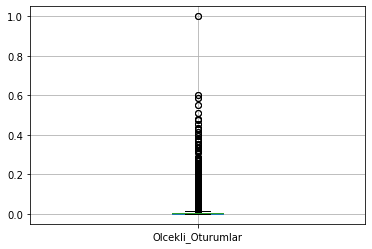

In [511]:
df['Olcekli_Oturumlar'] = scaled_array
df.boxplot("Olcekli_Oturumlar")

In [392]:
df

,Yil_Ay,Yil_Hafta,Kullanici_ID,Oturumlar,SepetUrunSayisi,Bounce_Rate,Sayfa_Goruntuleme,Tekil_Sayfa_Goruntuleme,Ort_Oturum_Suresi,Islem_Sayisi,Islem_Varmi,Sepette_Urun_Varmi
0,200105,200119,4231,62,0,0.451613,261,183,101.322581,0,0,0
1,200105,200121,4274,57,39,0.175439,720,447,707.754386,2,1,1
2,200105,200118,4231,38,6,0.421053,252,158,242.815789,0,0,1
3,200105,200120,800,33,5,0.484848,296,178,332.939394,1,1,1
4,200105,200119,6806,30,25,0.100000,724,327,662.900000,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
107799,200104,200117,7489,1,0,0.000000,13,10,80.000000,0,0,0
107800,200104,200117,10716,1,0,0.000000,8,6,217.000000,0,0,0
107801,200104,200117,551,1,1,0.000000,36,18,1104.000000,1,1,1
107802,200104,200117,6294,1,0,0.000000,12,10,318.000000,0,0,0


<AxesSubplot:xlabel='Oturumlar', ylabel='Sayfa_Goruntuleme'>

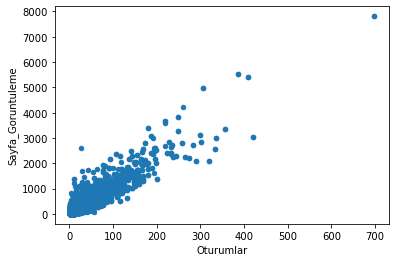

In [508]:
df.plot.scatter(x="Oturumlar", y="Sayfa_Goruntuleme")

In [394]:
t1 = df['Oturumlar'].value_counts(sort=False)
t2 = df['Oturumlar'].value_counts(normalize=True , sort=False)
tx = pd.concat([t1, t2],axis=1)
print(tx)

     Oturumlar  Oturumlar
0           31   0.000288
64          24   0.000223
128          2   0.000019
192          2   0.000019
1        32980   0.306139
..         ...        ...
190          2   0.000019
63          22   0.000204
127          1   0.000009
191          1   0.000009
319          2   0.000019

[196 rows x 2 columns]


<ipython-input-509-00e326144ab7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["logOturum"]=np.log(df["Oturumlar"])


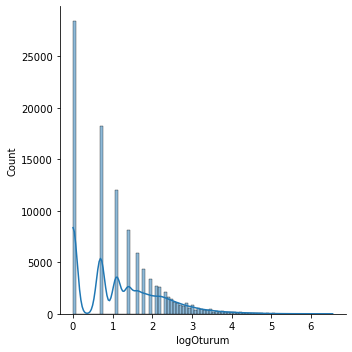

In [509]:
df["logOturum"]=np.log(df["Oturumlar"])
#df.reset_index()
sns.displot(df.logOturum, kde = True);

In [514]:
df["Oturum_Sayfa_Oran"] = df["Sayfa_Goruntuleme"]/df["Oturumlar"]

<ipython-input-514-9c6b6982ad92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Oturum_Sayfa_Oran"] = df["Sayfa_Goruntuleme"]/df["Oturumlar"]


In [396]:
df

,Yil_Ay,Yil_Hafta,Kullanici_ID,Oturumlar,SepetUrunSayisi,Bounce_Rate,Sayfa_Goruntuleme,Tekil_Sayfa_Goruntuleme,Ort_Oturum_Suresi,Islem_Sayisi,Islem_Varmi,Sepette_Urun_Varmi,Oturum_Sayfa_Oran
0,200105,200119,4231,62,0,0.451613,261,183,101.322581,0,0,0,4.209677
1,200105,200121,4274,57,39,0.175439,720,447,707.754386,2,1,1,12.631579
2,200105,200118,4231,38,6,0.421053,252,158,242.815789,0,0,1,6.631579
3,200105,200120,800,33,5,0.484848,296,178,332.939394,1,1,1,8.969697
4,200105,200119,6806,30,25,0.100000,724,327,662.900000,3,1,1,24.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107799,200104,200117,7489,1,0,0.000000,13,10,80.000000,0,0,0,13.000000
107800,200104,200117,10716,1,0,0.000000,8,6,217.000000,0,0,0,8.000000
107801,200104,200117,551,1,1,0.000000,36,18,1104.000000,1,1,1,36.000000
107802,200104,200117,6294,1,0,0.000000,12,10,318.000000,0,0,0,12.000000


<AxesSubplot:>

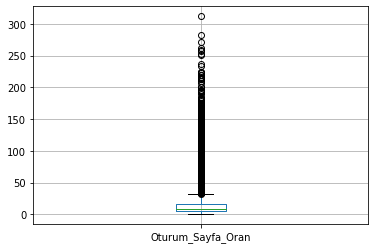

In [515]:
df.boxplot("Oturum_Sayfa_Oran")

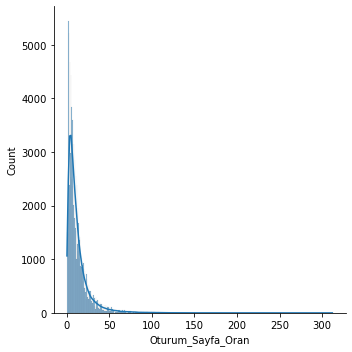

In [516]:
sns.displot(df.Oturum_Sayfa_Oran, kde = True);

<AxesSubplot:xlabel='Oturum_Sayfa_Oran', ylabel='Islem_Sayisi'>

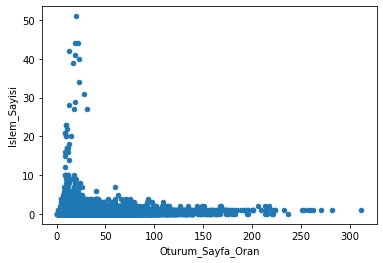

In [517]:
df.plot.scatter(x="Oturum_Sayfa_Oran", y="Islem_Sayisi")

In [401]:
df.Oturum_Sayfa_Oran.describe()

count    107698.000000
mean         12.482193
std          14.629169
min           0.000000
25%           4.000000
50%           8.250000
75%          15.250000
max         312.000000
Name: Oturum_Sayfa_Oran, dtype: float64

<ipython-input-518-20d7f133cc49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["KareKok_OturumOran"] = df.Oturum_Sayfa_Oran ** 0.5


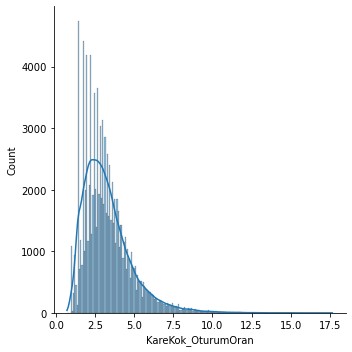

In [518]:
df["KareKok_OturumOran"] = df.Oturum_Sayfa_Oran ** 0.5
sns.displot(df["KareKok_OturumOran"], kde = True);

In [519]:
df.KareKok_OturumOran.describe()

count    102225.000000
mean          3.267738
std           1.555290
min           0.707107
25%           2.190890
50%           2.996210
75%           4.000000
max          17.663522
Name: KareKok_OturumOran, dtype: float64

In [322]:
##kullanıcı id çıkart kullanıcının işlemlerini say

,Yil_Ay,Yil_Hafta,Kullanici_ID,Oturumlar,SepetUrunSayisi,Bounce_Rate,Sayfa_Goruntuleme,Tekil_Sayfa_Goruntuleme,Ort_Oturum_Suresi,Islem_Sayisi,Islem_Varmi,Sepette_Urun_Varmi,Olcekli_Oturumlar,logOturum,Oturum_Sayfa_Oran,logOturum_Sayfa_Oran
0,200105,200119,4231,62,0,0.451613,261,183,101.322581,0,0,0,0.088825,4.127134,4.209677,1.437386
2,200105,200118,4231,38,6,0.421053,252,158,242.815789,0,0,1,0.054441,3.637586,6.631579,1.891843
7,200105,200120,4231,30,0,0.466667,117,83,72.000000,0,0,0,0.042980,3.401197,3.900000,1.360977
18,200105,200121,4231,24,9,0.000000,304,179,483.833333,1,1,1,0.034384,3.178054,12.666667,2.538974
28,200105,200122,4231,28,3,0.178571,245,164,225.464286,0,0,1,0.040115,3.332205,8.750000,2.169054
1511,200107,200127,4231,2,0,0.000000,18,12,247.500000,0,0,0,0.002865,0.693147,9.000000,2.197225
1985,200107,200130,4231,27,5,0.407407,194,117,194.259259,0,0,1,0.038682,3.295837,7.185185,1.972021
1993,200107,200129,4231,26,3,0.038462,254,153,287.307692,0,0,1,0.037249,3.258097,9.769231,2.279238
2046,200107,200131,4231,14,0,0.571429,33,26,32.285714,0,0,0,0.020057,2.639057,2.357143,0.857450
2056,200107,200128,4231,13,2,0.076923,162,104,495.153846,1,1,1,0.018625,2.564949,12.461538,2.522647


<AxesSubplot:>

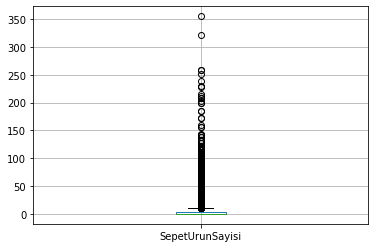

In [520]:
df.boxplot("SepetUrunSayisi")

In [405]:
df.SepetUrunSayisi.describe()

count    107729.000000
mean          3.195388
std           8.077865
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max         355.000000
Name: SepetUrunSayisi, dtype: float64

In [410]:
df[df["SepetUrunSayisi"] > 0].SepetUrunSayisi.describe()

count    47818.000000
mean         7.198879
std         10.871349
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        355.000000
Name: SepetUrunSayisi, dtype: float64

<AxesSubplot:>

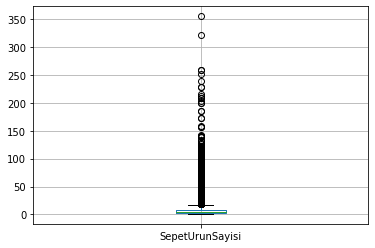

In [411]:
df[df["SepetUrunSayisi"] > 0].boxplot("SepetUrunSayisi")

In [412]:
df

,Yil_Ay,Yil_Hafta,Kullanici_ID,Oturumlar,SepetUrunSayisi,Bounce_Rate,Sayfa_Goruntuleme,Tekil_Sayfa_Goruntuleme,Ort_Oturum_Suresi,Islem_Sayisi,Islem_Varmi,Sepette_Urun_Varmi,Oturum_Sayfa_Oran,KareKok_OturumOran
0,200105,200119,4231,62,0,0.451613,261,183,101.322581,0,0,0,4.209677,2.051750
1,200105,200121,4274,57,39,0.175439,720,447,707.754386,2,1,1,12.631579,3.554093
2,200105,200118,4231,38,6,0.421053,252,158,242.815789,0,0,1,6.631579,2.575185
3,200105,200120,800,33,5,0.484848,296,178,332.939394,1,1,1,8.969697,2.994945
4,200105,200119,6806,30,25,0.100000,724,327,662.900000,3,1,1,24.133333,4.912569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107799,200104,200117,7489,1,0,0.000000,13,10,80.000000,0,0,0,13.000000,3.605551
107800,200104,200117,10716,1,0,0.000000,8,6,217.000000,0,0,0,8.000000,2.828427
107801,200104,200117,551,1,1,0.000000,36,18,1104.000000,1,1,1,36.000000,6.000000
107802,200104,200117,6294,1,0,0.000000,12,10,318.000000,0,0,0,12.000000,3.464102


In [416]:
def normalization (array_2d):
    float_array = array_2d.values.astype(float)
    min_max_scaler = preprocessing.MinMaxScaler()
    scaled_array = min_max_scaler.fit_transform(float_array)
    return scaled_array

In [451]:
def robust_normalization (array_2d):
    float_array = array_2d.values.astype(float)
    robust_scaler = preprocessing.RobustScaler()
    transformer = robust_scaler.fit(float_array)
    return transformer.transform(float_array)

<AxesSubplot:>

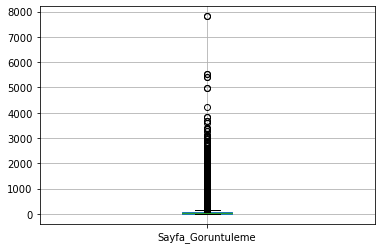

In [413]:
df.boxplot("Sayfa_Goruntuleme")

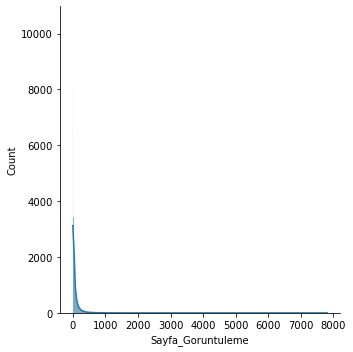

In [414]:
sns.displot(df["Sayfa_Goruntuleme"], kde=True)

In [417]:
df['normalizedPageviews']  = normalization(df[['Sayfa_Goruntuleme']])

<ipython-input-417-a1d9f8312ba3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalizedPageviews']  = normalization(df[['Sayfa_Goruntuleme']])


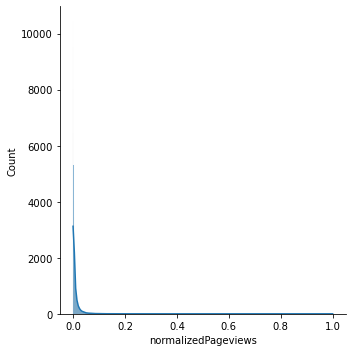

In [418]:
sns.displot(df["normalizedPageviews"], kde=True)

<AxesSubplot:>

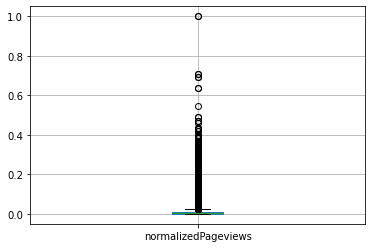

In [419]:
df.boxplot("normalizedPageviews")

In [452]:

df["Robust_Sayfa_Goruntuleme"] = robust_normalization(df[['Sayfa_Goruntuleme']])

<ipython-input-452-d69e7c8b5f19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Robust_Sayfa_Goruntuleme"] = robust_normalization(df[['Sayfa_Goruntuleme']])


In [453]:
df["Robust_Sayfa_Goruntuleme"]

0          3.507463
1         10.358209
2          3.373134
3          4.029851
4         10.417910
            ...    
107799    -0.194030
107800    -0.268657
107801     0.149254
107802    -0.208955
107803    -0.313433
Name: Robust_Sayfa_Goruntuleme, Length: 107729, dtype: float64

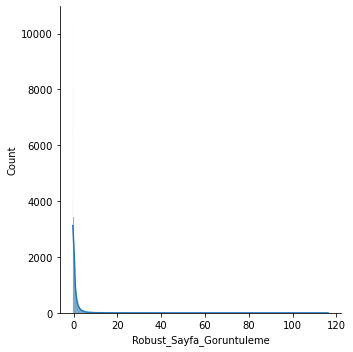

In [454]:
sns.displot(df["Robust_Sayfa_Goruntuleme"], kde=True)

<AxesSubplot:>

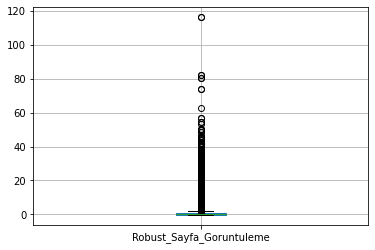

In [455]:
df.boxplot("Robust_Sayfa_Goruntuleme")

In [430]:
df["TumGoruntuleme_Oran_TekilSayfa"] = df["Sayfa_Goruntuleme"]/df["Tekil_Sayfa_Goruntuleme"]

<ipython-input-430-7f4c12286139>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TumGoruntuleme_Oran_TekilSayfa"] = df["Sayfa_Goruntuleme"]/df["Tekil_Sayfa_Goruntuleme"]


In [457]:
df["Robust_TumGoruntuleme_Oran_TekilSayfa"] = robust_normalization(df[['TumGoruntuleme_Oran_TekilSayfa']])

<ipython-input-457-8102e96434ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Robust_TumGoruntuleme_Oran_TekilSayfa"] = robust_normalization(df[['TumGoruntuleme_Oran_TekilSayfa']])


<AxesSubplot:>

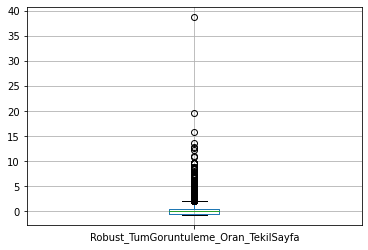

In [458]:
df.boxplot("Robust_TumGoruntuleme_Oran_TekilSayfa")

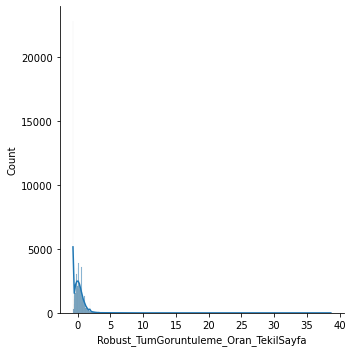

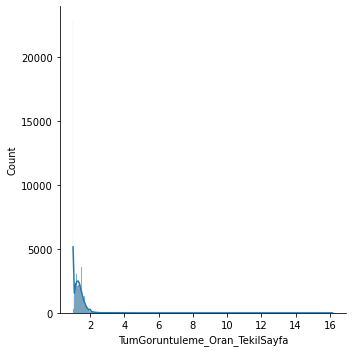

In [460]:
sns.displot(df["Robust_TumGoruntuleme_Oran_TekilSayfa"], kde=True)
sns.displot(df["TumGoruntuleme_Oran_TekilSayfa"], kde=True)

## Ort_Oturum_Suresi kolonu incelemesi

In [462]:
df["Ort_Oturum_Suresi"].describe()

count    107729.000000
mean        538.648008
std         671.584335
min           0.000000
25%         128.571429
50%         352.000000
75%         694.750000
max       16044.000000
Name: Ort_Oturum_Suresi, dtype: float64

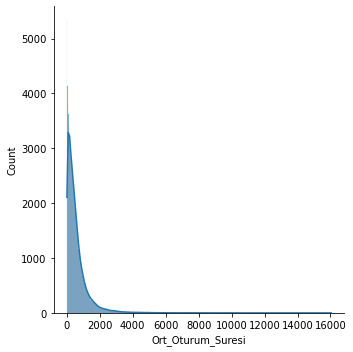

In [503]:
sns.displot(df["Ort_Oturum_Suresi"], kde=True)

<AxesSubplot:>

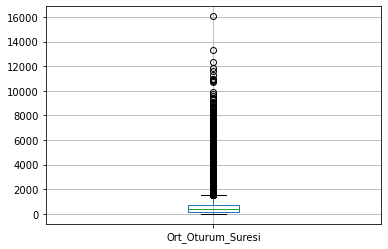

In [502]:
df.boxplot("Ort_Oturum_Suresi")

In [471]:
##sayfa başına ortalama oturum sürelerine bir bakalım
df["Oturum_Suresi_Oran_Sayfa_Goruntuleme"] = df["Ort_Oturum_Suresi"]/df["Sayfa_Goruntuleme"]

<ipython-input-471-74f832b897f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Oturum_Suresi_ORan_Sayfa_Goruntuleme"] = df["Ort_Oturum_Suresi"]/df["Sayfa_Goruntuleme"]


In [475]:
df["Oturum_Suresi_ORan_Sayfa_Goruntuleme"].describe()

count    1.076980e+05
mean              inf
std               NaN
min      0.000000e+00
25%      4.206094e+00
50%      9.983333e+00
75%      2.268889e+01
max               inf
Name: Oturum_Suresi_ORan_Sayfa_Goruntuleme, dtype: float64

In [ ]:
## yukarıda görüldüğü gibi max: inf değeri çıktı, burada bir gariplik var. 
## Payda olan Sayfa_Goruntulemenin 0 olduğu değerler var mı bakalım

In [484]:
sum((df["Sayfa_Goruntuleme"] == 0))

59

In [483]:
sum((df["Sayfa_Goruntuleme"] == 0) & (df["Islem_Varmi"] == 1))

2

In [486]:
df[df["Sayfa_Goruntuleme"] == 0].head()

,Yil_Ay,Yil_Hafta,Kullanici_ID,Oturumlar,SepetUrunSayisi,Bounce_Rate,Sayfa_Goruntuleme,Tekil_Sayfa_Goruntuleme,Ort_Oturum_Suresi,Islem_Sayisi,Islem_Varmi,Sepette_Urun_Varmi,Oturum_Sayfa_Oran,KareKok_OturumOran,normalizedPageviews,TumGoruntuleme_Oran_TekilSayfa,Robust_Sayfa_Goruntuleme,Robust_TumGoruntuleme_Oran_TekilSayfa,Oturum_Suresi_ORan_Sayfa_Goruntuleme
815,200107,200131,2991,1,3,0.0,0,0,1372.000000,0,0,1,0.0,0.0,0.0,NaN,-0.38806,NaN,inf
1221,200107,200128,2991,0,0,0.0,0,0,0.000000,0,0,0,NaN,NaN,0.0,NaN,-0.38806,NaN,NaN
5340,200105,200122,15301,0,0,0.0,0,0,0.000000,0,0,0,NaN,NaN,0.0,NaN,-0.38806,NaN,NaN
5341,200105,200122,2991,0,0,0.0,0,0,0.000000,0,0,0,NaN,NaN,0.0,NaN,-0.38806,NaN,NaN
8020,200105,200122,8244,3,2,0.0,0,0,559.333333,0,0,1,0.0,0.0,0.0,NaN,-0.38806,NaN,inf


In [487]:
##Oturumu, ortalam oturum süresi, sepette ürün sayısı olan sayfa görüntülemesi sıfır olan veriler var. 
##Bunları hatalı veri kabul edip veri setimizden çıkartıyoruz
df = df[df["Sayfa_Goruntuleme"] != 0]a1

In [495]:
##Başka mantıksız veriler var mı bakalım
sum(df["Oturumlar"] <= 0)

0

In [496]:
sum(df["Tekil_Sayfa_Goruntuleme"] <= 0)


0

In [497]:
sum(df["Ort_Oturum_Suresi"] <= 0)

5445

In [499]:
df[df["Ort_Oturum_Suresi"] <= 0]

,Yil_Ay,Yil_Hafta,Kullanici_ID,Oturumlar,SepetUrunSayisi,Bounce_Rate,Sayfa_Goruntuleme,Tekil_Sayfa_Goruntuleme,Ort_Oturum_Suresi,Islem_Sayisi,Islem_Varmi,Sepette_Urun_Varmi,Oturum_Sayfa_Oran,KareKok_OturumOran,normalizedPageviews,TumGoruntuleme_Oran_TekilSayfa,Robust_Sayfa_Goruntuleme,Robust_TumGoruntuleme_Oran_TekilSayfa,Oturum_Suresi_ORan_Sayfa_Goruntuleme
288,200107,200130,2798,1,0,1.0,1,1,0.0,0,0,0,1.0,1.0,0.000128,1.0,-0.373134,-0.723208,0.0
294,200105,200120,5590,7,0,1.0,7,7,0.0,0,0,0,1.0,1.0,0.000896,1.0,-0.283582,-0.723208,0.0
655,200107,200131,13578,1,0,1.0,1,1,0.0,0,0,0,1.0,1.0,0.000128,1.0,-0.373134,-0.723208,0.0
664,200107,200129,13812,2,0,1.0,2,2,0.0,0,0,0,1.0,1.0,0.000256,1.0,-0.358209,-0.723208,0.0
676,200107,200127,13869,1,0,1.0,1,1,0.0,0,0,0,1.0,1.0,0.000128,1.0,-0.373134,-0.723208,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107749,200104,200117,11052,1,0,1.0,1,1,0.0,0,0,0,1.0,1.0,0.000128,1.0,-0.373134,-0.723208,0.0
107750,200104,200117,3774,1,0,1.0,1,1,0.0,0,0,0,1.0,1.0,0.000128,1.0,-0.373134,-0.723208,0.0
107774,200104,200115,8388,1,0,1.0,1,1,0.0,0,0,0,1.0,1.0,0.000128,1.0,-0.373134,-0.723208,0.0
107778,200104,200115,13033,1,0,1.0,1,1,0.0,0,0,0,1.0,1.0,0.000128,1.0,-0.373134,-0.723208,0.0


In [501]:
df = df[df["Ort_Oturum_Suresi"] > 0]

In [522]:
df["Oturum_Suresi_Oran_Sayfa_Goruntuleme"] = df["Ort_Oturum_Suresi"]/df["Sayfa_Goruntuleme"]

<ipython-input-522-db451486c8fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Oturum_Suresi_Oran_Sayfa_Goruntuleme"] = df["Ort_Oturum_Suresi"]/df["Sayfa_Goruntuleme"]


<AxesSubplot:>

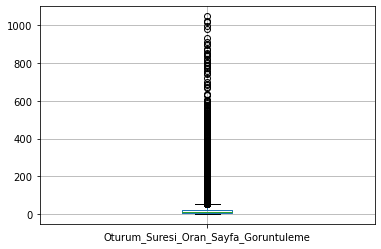

In [523]:
df.boxplot("Oturum_Suresi_Oran_Sayfa_Goruntuleme")

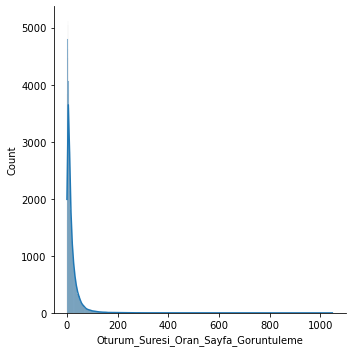

In [524]:
sns.displot(df["Oturum_Suresi_Oran_Sayfa_Goruntuleme"], kde=True)

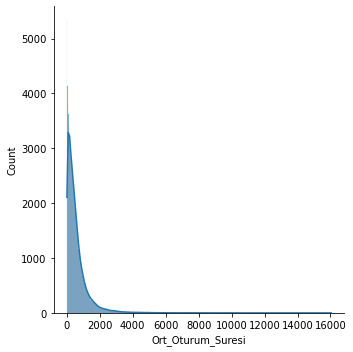

In [507]:
## çıkartılmış veriler ile yeni dağılım
sns.displot(df["Ort_Oturum_Suresi"], kde=True)

In [525]:
df["Ort_Oturum_Suresi"].describe()

count    102225.000000
mean        567.500619
std         677.400289
min           0.045455
25%         159.000000
50%         379.000000
75%         722.600000
max       16044.000000
Name: Ort_Oturum_Suresi, dtype: float64

In [536]:
df[(df["Bounce_Rate"] == 1) & (df["Ort_Oturum_Suresi"] / df["Sayfa_Goruntuleme"] > 30)]

,Yil_Ay,Yil_Hafta,Kullanici_ID,Oturumlar,SepetUrunSayisi,Bounce_Rate,Sayfa_Goruntuleme,Tekil_Sayfa_Goruntuleme,Ort_Oturum_Suresi,Islem_Sayisi,...,normalizedPageviews,TumGoruntuleme_Oran_TekilSayfa,Robust_Sayfa_Goruntuleme,Robust_TumGoruntuleme_Oran_TekilSayfa,Oturum_Suresi_ORan_Sayfa_Goruntuleme,logOturum,Olcekli_Oturumlar,logOturumOlcekli,robustOturum,Oturum_Suresi_Oran_Sayfa_Goruntuleme
828,200107,200127,11316,1,0,1.0,1,1,38.0,0,...,0.000128,1.0,-0.373134,-0.723208,38.000000,0.000000,0.000000,-inf,-0.4,38.000000
5974,200107,200127,9863,1,0,1.0,1,1,79.0,0,...,0.000128,1.0,-0.373134,-0.723208,79.000000,0.000000,0.000000,-inf,-0.4,79.000000
10624,200105,200122,14165,1,0,1.0,1,1,37.0,0,...,0.000128,1.0,-0.373134,-0.723208,37.000000,0.000000,0.000000,-inf,-0.4,37.000000
16051,200105,200119,3905,2,0,1.0,2,2,84.0,0,...,0.000256,1.0,-0.358209,-0.723208,42.000000,0.693147,0.001435,-6.546785,-0.2,42.000000
17845,200107,200128,10722,1,0,1.0,1,1,239.0,0,...,0.000128,1.0,-0.373134,-0.723208,239.000000,0.000000,0.000000,-inf,-0.4,239.000000
18211,200107,200131,8651,1,0,1.0,1,1,32.0,0,...,0.000128,1.0,-0.373134,-0.723208,32.000000,0.000000,0.000000,-inf,-0.4,32.000000
20334,200107,200130,14015,1,0,1.0,1,1,55.0,0,...,0.000128,1.0,-0.373134,-0.723208,55.000000,0.000000,0.000000,-inf,-0.4,55.000000
21414,200107,200131,13622,1,0,1.0,1,1,65.0,0,...,0.000128,1.0,-0.373134,-0.723208,65.000000,0.000000,0.000000,-inf,-0.4,65.000000
23441,200107,200127,11407,1,0,1.0,1,1,46.0,0,...,0.000128,1.0,-0.373134,-0.723208,46.000000,0.000000,0.000000,-inf,-0.4,46.000000
25364,200107,200126,11095,1,0,1.0,1,1,92.0,0,...,0.000128,1.0,-0.373134,-0.723208,92.000000,0.000000,0.000000,-inf,-0.4,92.000000


In [539]:
## bounce_rate değeri 1 ise sayfa başına ortalama oturum süresi 30 sn ' den fazla olmamalı
## bu kuralı bozan verileri hatalı kabul edip çıkartıyorum
df = df[~((df["Bounce_Rate"] == 1) & (df["Ort_Oturum_Suresi"] / df["Sayfa_Goruntuleme"] > 30))]

In [548]:
## 3 sn altındaki oturum süresi olanları çıkartıyorum
sum(df["Ort_Oturum_Suresi"] < 3)

835

In [549]:
df = df[df["Ort_Oturum_Suresi"] >= 3]

In [551]:
df.Ort_Oturum_Suresi.describe()

count    101346.000000
mean        572.349795
std         678.302268
min           3.000000
25%         163.666667
50%         383.207143
75%         727.200000
max       16044.000000
Name: Ort_Oturum_Suresi, dtype: float64

In [555]:
df["Oturum_Suresi_Oran_Sayfa_Goruntuleme"] = df["Ort_Oturum_Suresi"]/df["Sayfa_Goruntuleme"]

In [556]:
df["Oturum_Suresi_Oran_Sayfa_Goruntuleme"].describe()

count    101346.000000
mean         20.740966
std          35.665798
min           0.066436
25%           5.006168
50%          10.900000
75%          23.895559
max        1048.000000
Name: Oturum_Suresi_Oran_Sayfa_Goruntuleme, dtype: float64

In [557]:
df

,Yil_Ay,Yil_Hafta,Kullanici_ID,Oturumlar,SepetUrunSayisi,Bounce_Rate,Sayfa_Goruntuleme,Tekil_Sayfa_Goruntuleme,Ort_Oturum_Suresi,Islem_Sayisi,...,normalizedPageviews,TumGoruntuleme_Oran_TekilSayfa,Robust_Sayfa_Goruntuleme,Robust_TumGoruntuleme_Oran_TekilSayfa,Oturum_Suresi_ORan_Sayfa_Goruntuleme,logOturum,Olcekli_Oturumlar,logOturumOlcekli,robustOturum,Oturum_Suresi_Oran_Sayfa_Goruntuleme
0,200105,200119,4231,62,0,0.451613,261,183,101.322581,0,...,0.033419,1.426230,3.507463,0.384218,0.388209,4.127134,0.087518,-2.435912,11.8,0.388209
1,200105,200121,4274,57,39,0.175439,720,447,707.754386,2,...,0.092190,1.610738,10.358209,0.863607,0.982992,4.043051,0.080344,-2.521434,10.8,0.982992
2,200105,200118,4231,38,6,0.421053,252,158,242.815789,0,...,0.032266,1.594937,3.373134,0.822552,0.963555,3.637586,0.053085,-2.935867,7.0,0.963555
3,200105,200120,800,33,5,0.484848,296,178,332.939394,1,...,0.037900,1.662921,4.029851,0.999189,1.124795,3.496508,0.045911,-3.081050,6.0,1.124795
4,200105,200119,6806,30,25,0.100000,724,327,662.900000,3,...,0.092702,2.214067,10.417910,2.431172,0.915608,3.401197,0.041607,-3.179490,5.4,0.915608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107799,200104,200117,7489,1,0,0.000000,13,10,80.000000,0,...,0.001665,1.300000,-0.194030,0.056250,6.153846,0.000000,0.000000,-inf,-0.4,6.153846
107800,200104,200117,10716,1,0,0.000000,8,6,217.000000,0,...,0.001024,1.333333,-0.268657,0.142856,27.125000,0.000000,0.000000,-inf,-0.4,27.125000
107801,200104,200117,551,1,1,0.000000,36,18,1104.000000,1,...,0.004609,2.000000,0.149254,1.874984,30.666667,0.000000,0.000000,-inf,-0.4,30.666667
107802,200104,200117,6294,1,0,0.000000,12,10,318.000000,0,...,0.001536,1.200000,-0.208955,-0.203570,26.500000,0.000000,0.000000,-inf,-0.4,26.500000


In [424]:
df2 = df.drop(labels = ['Kullanici_ID'], axis = 1)

In [425]:
df2

,Yil_Ay,Yil_Hafta,Oturumlar,SepetUrunSayisi,Bounce_Rate,Sayfa_Goruntuleme,Tekil_Sayfa_Goruntuleme,Ort_Oturum_Suresi,Islem_Sayisi,Islem_Varmi,Sepette_Urun_Varmi,Oturum_Sayfa_Oran,KareKok_OturumOran,normalizedPageviews
0,200105,200119,62,0,0.451613,261,183,101.322581,0,0,0,4.209677,2.051750,0.033419
1,200105,200121,57,39,0.175439,720,447,707.754386,2,1,1,12.631579,3.554093,0.092190
2,200105,200118,38,6,0.421053,252,158,242.815789,0,0,1,6.631579,2.575185,0.032266
3,200105,200120,33,5,0.484848,296,178,332.939394,1,1,1,8.969697,2.994945,0.037900
4,200105,200119,30,25,0.100000,724,327,662.900000,3,1,1,24.133333,4.912569,0.092702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107799,200104,200117,1,0,0.000000,13,10,80.000000,0,0,0,13.000000,3.605551,0.001665
107800,200104,200117,1,0,0.000000,8,6,217.000000,0,0,0,8.000000,2.828427,0.001024
107801,200104,200117,1,1,0.000000,36,18,1104.000000,1,1,1,36.000000,6.000000,0.004609
107802,200104,200117,1,0,0.000000,12,10,318.000000,0,0,0,12.000000,3.464102,0.001536


In [426]:
# Split-out validation dataset
array = df2.values
X = array[:,0:10]
Y = array[:,10]
validation_size = 0.20
seed = 7
#X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=7, stratify=Y)

In [714]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, Y_test)))

Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.85


In [427]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, Y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test,Y_test)))

Accuracy of LDA classifier on training set: 0.79
Accuracy of LDA classifier on test set: 0.79


In [715]:
array = df2.values
X = array[:,0:10]

In [716]:
X

array([[2.00105000e+05, 2.00119000e+05, 6.20000000e+01, ...,
        1.01322581e+02, 0.00000000e+00, 0.00000000e+00],
       [2.00105000e+05, 2.00121000e+05, 5.70000000e+01, ...,
        7.07754386e+02, 2.00000000e+00, 1.00000000e+00],
       [2.00105000e+05, 2.00118000e+05, 3.80000000e+01, ...,
        2.42815789e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.00104000e+05, 2.00117000e+05, 1.00000000e+00, ...,
        1.10400000e+03, 1.00000000e+00, 1.00000000e+00],
       [2.00104000e+05, 2.00117000e+05, 1.00000000e+00, ...,
        3.18000000e+02, 0.00000000e+00, 0.00000000e+00],
       [2.00104000e+05, 2.00117000e+05, 1.00000000e+00, ...,
        1.62000000e+02, 0.00000000e+00, 0.00000000e+00]])

In [717]:
Y = array[:,10]

In [718]:
Y

array([0., 1., 1., ..., 1., 0., 0.])